In [9]:
import pandas as pd
import numpy as np 
from ydata_profiling import ProfileReport
import missingno as msno
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

In [2]:
%cd /Users/khoi.vo/Documents/self-project/ZaloPayTest

/Users/khoi.vo/Documents/self-project/ZaloPayTest


In [3]:
train_df = pd.read_csv("dataset/train.csv")
train_df['month'] = pd.to_datetime(train_df['month'], format ='%Y-%m')
train_df

,userID_hash,month,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,previous_x0,previous_x1,previous_x2,previous_x3,previous_x4,previous_x5,previous_x6,previous_x7,previous_x8,previous_x9,previous_x10,previous_x11,previous_x12,previous_x13,previous_x14,previous_x15,previous_x16,previous_x17,previous_x18,previous_x19,previous_x20,previous_x21,previous_x22,previous_x23,previous_x24,previous_x25,previous_x26,previous_x27,previous_x28,previous_x29,previous_x30,previous_x31,previous_x32,previous_x33,previous_x34,previous_x35,previous_x36,previous_x37,previous_x38,previous_x39,previous_x40,previous_x41,previous_x42,previous_x43,previous_x44,previous_x45,previous_x46,previous_x47,previous_x48,previous_x49,previous_x50,previous_x51,previous_x52,previous_x53,previous_x54,y
0,2d90a44b2d37900619c2398ee3b07c24ae45c9436fb44b...,2022-09-01,4.000000,4.0,0.0,2.0,2.0,0.0,138000.0,0.0,34500.000,0.000,1.000000,12.000,2.0,0.0,2.0,2.0,0.0,69000.0,0.0,34500.000,0.0,1.000000,12.000000,2.0,0.0,2.0,2.0,0.0,69000.0,0.0,34500.000,0.000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,2.0,0.0,2.0,2.0,0.0,69000.0,0.0,34500.000,0.000,1.000000,2.5,4.0,1.0,2.0,2.0,1.0,122000.0,22000.0,24400.00,4400.0,0.8,5.0,2.0,1.0,2.0,2.0,1.0,61000.0,22000.0,20333.334,7333.3335,0.666667,10.0,2.0,0.0,2.0,2.0,0.0,61000.0,0.0,30500.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,2.0,0.0,2.0,2.0,0.0,61000.0,0.0,30500.0,0.0,1.0,177000.0
1,097a3239adb67f3d00fe75338a7e1082363746384dff00...,2022-07-01,2.090909,11.0,1.0,8.0,8.0,1.0,7087542.0,750000.0,590628.500,62500.000,0.916667,9.500,2.0,1.0,2.0,2.0,1.0,1600000.0,750000.0,533333.300,250000.0,0.666667,2.625000,9.0,0.0,7.0,7.0,0.0,5487542.0,0.0,609726.900,0.000,1.000000,1.750000,5.0,0.0,3.0,3.0,0.0,3720542.0,0.0,744108.4,0.0,1.0,5.333334,4.0,0.0,4.0,4.0,0.0,1767000.0,0.0,441750.000,0.000,1.000000,1.8,11.0,0.0,5.0,5.0,0.0,9553167.0,0.0,868469.75,0.0,1.0,NaN,1.0,0.0,1.0,1.0,0.0,200000.0,0.0,200000.000,0.0000,1.000000,2.0,10.0,0.0,5.0,5.0,0.0,9353167.0,0.0,935316.7,0.0,1.0,2.285714,8.0,0.0,4.0,4.0,0.0,9172867.0,0.0,1146608.4,0.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,180300.0,0.0,90150.0,0.0,1.0,14893793.0
2,9f9f56fdc788f9a817ec9928309921539a47f6656fe7d6...,2022-07-01,9.333333,4.0,0.0,3.0,3.0,0.0,267050.0,0.0,66762.500,0.000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.333333,4.0,0.0,3.0,3.0,0.0,267050.0,0.0,66762.500,0.000,1.000000,9.333333,4.0,0.0,3.0,3.0,0.0,267050.0,0.0,66762.5,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,232200.0
3,b5ccb95b3a44bc48b5d8bd819cf48689f756c5c2669619...,2022-10-01,0.500000,19.0,4.0,7.0,7.0,1.0,1756880.0,453000.0,76386.086,19695.652,0.826087,1.375,9.0,0.0,7.0,7.0,0.0,776000.0,0.0,86222.220,0.0,1.000000,0.846154,10.0,4.0,7.0,7.0,1.0,980880.0,453000.0,70062.860,32357.143,0.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.846154,10.0,4.0,7.0,7.0,1.0,980880.0,453000.0,70062.860,32357.143,0.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410200.0
4,afd48246a21834776f945fc30e10ea7bba1d051b01798d...,2022-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Explore Data Analysis

In [5]:
train_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1777360 entries, 0 to 1777359
Data columns (total 113 columns):
 #    Column        Dtype         
---   ------        -----         
 0    userID_hash   object        
 1    month         datetime64[ns]
 2    x0            float64       
 3    x1            float64       
 4    x2            float64       
 5    x3            float64       
 6    x4            float64       
 7    x5            float64       
 8    x6            float64       
 9    x7            float64       
 10   x8            float64       
 11   x9            float64       
 12   x10           float64       
 13   x11           float64       
 14   x12           float64       
 15   x13           float64       
 16   x14           float64       
 17   x15           float64       
 18   x16           float64       
 19   x17           float64       
 20   x18           float64       
 21   x19           float64       
 22   x20           float64       
 23   x21  

### Handle missing value

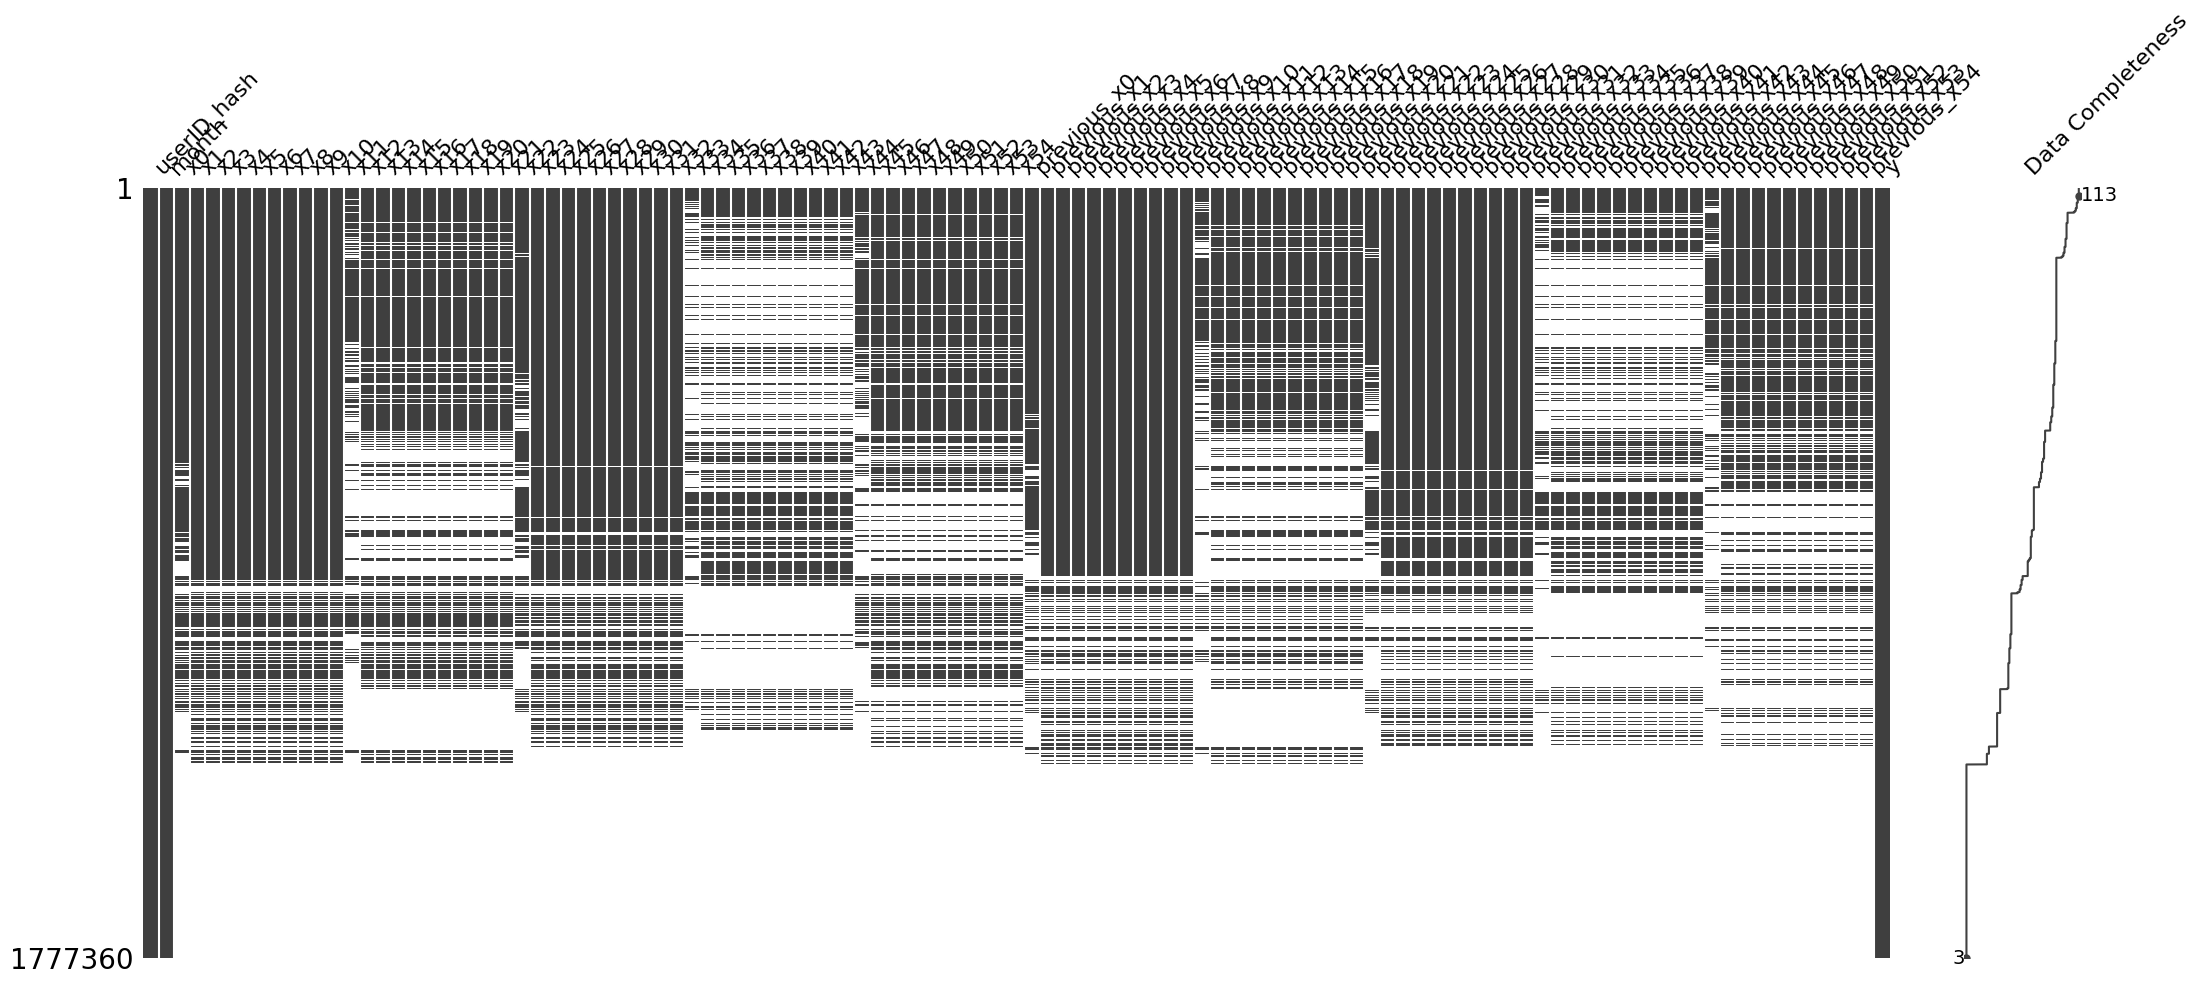

In [6]:
msno.matrix(train_df, labels=True, sort="descending");

In [7]:
numeric_train_df = train_df.select_dtypes(include= "number")
numeric_train_df.shape

(1777360, 111)

<Axes: title={'center': 'Percentage of missing values per feature'}, ylabel='Ratio of missing values per feature'>

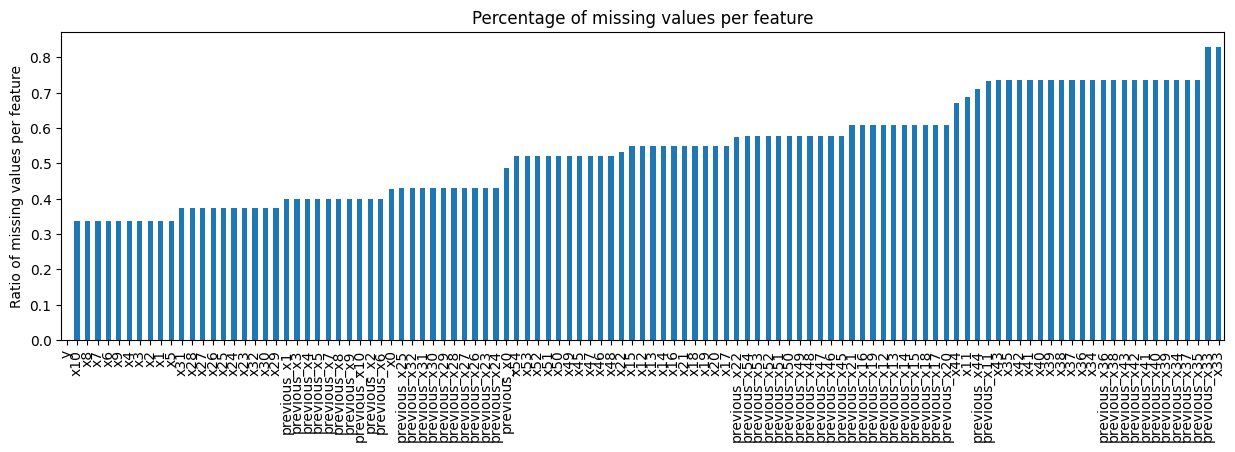

In [13]:
numeric_train_df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature")